In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# df=pd.read_excel("D:/AirQualityUCI.xlsx")
#df

df=pd.read_csv("D:/air+quality/AirQualityUCI.csv",sep=";",usecols=range(0,15))
df=df.replace(-200,np.nan)
for i in range(2,15):
    df.iloc[:,i].fillna(int(df.iloc[:,i].mean()), inplace=True)

In [4]:
usecol=df.select_dtypes(include=['float64','int64']).columns
matrix=df[usecol].corr()
RHcorr=matrix['RH'].sort_values(ascending=False)
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [5]:
def remove_outliers_zscore(df, feature, z_score_threshold=5):

    mean_value = df[feature].mean()
    std_dev = df[feature].std()

    df['z_score'] = (df[feature] - mean_value) / std_dev

    outliers = df[abs(df['z_score']) > z_score_threshold]
    df_no_outliers = df[abs(df['z_score']) <= z_score_threshold]


    print("Number of outliers removed:", len(outliers))
    print("Z-Score Threshold:", z_score_threshold)


    return df_no_outliers.drop(columns=['z_score'])


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X=df.drop(columns='RH')
Y=df['RH']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)

(8050, 12)
(1421, 12)


In [7]:
def cost(y_hat, y_train):
    l = (y_hat - y_train) ** 2
    cost = l.mean()
    return cost

In [8]:
W = np.zeros(X_train.shape[1])

def gradient_descent(X_train, y_train, W, learning_rate, num_epochs):
    L=[]
    for _ in range(num_epochs):
        y_hat = np.dot(X_train, W)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        W -= learning_rate * gradient
        L.append(cost(y_hat, y_train))

    return W,L

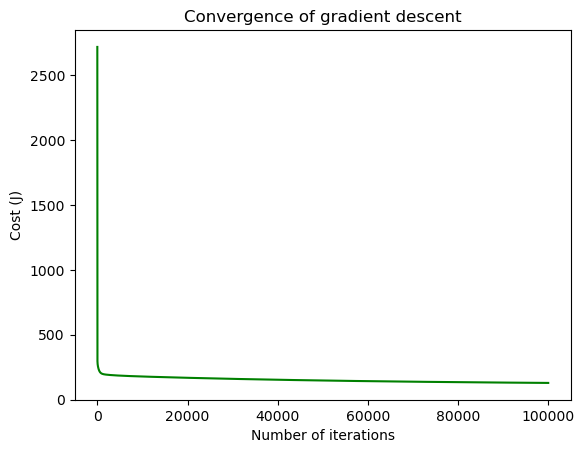

In [9]:
learning_rate = 0.0000003
num_epochs = 100000

W,L = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

#Plotting Cost v/s Iterations
plt.plot(range(1, num_epochs + 1), L, color='r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

y_hat_t= np.dot(X_test, W)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Squared Error on Test Set: 126.59629957745604
R2 Score: 0.5649655397038278


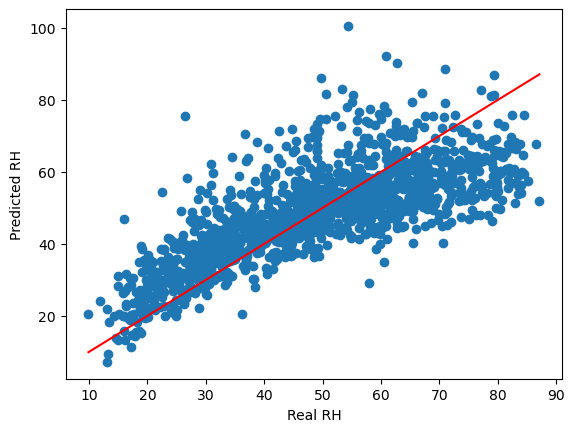

In [16]:
#from scratch
msescratch = mean_squared_error(y_test, y_hat_t)
print("Mean Squared Error on Test Set:", msescratch)
r2_1 = r2_score(y_test,y_hat_t)
print("R2 Score:", r2_1)

plt.scatter(y_test, y_hat_t)
plt.xlabel("Real RH")
plt.ylabel("Predicted RH")

x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='red')
plt.show()

Mean Squared Error on Test Set: 33.47882257112495
R2 Score: 0.8849536553817703


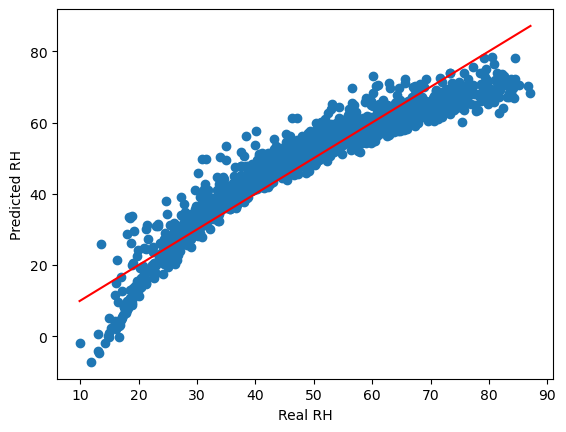

In [17]:
#using sklearn
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse2)
r2_2 = r2_score(y_test,y_pred)
print("R2 Score:", r2_2)


plt.scatter(y_test, y_pred)
plt.xlabel("Real RH")
plt.ylabel("Predicted RH")

x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='red')
plt.show()